In [17]:
"""Data classification and EDA tasks."""

'Data classification and EDA tasks.'

# Классификация данных и задачи EDA

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats import poisson

## Категориальные и количественные данные

### Категориальные данные

#### Номинальные данные

In [19]:
# поместим данные о количестве автомобилей различных марок в датафрейм
cars = pd.DataFrame(
    {"model": ["Renault", "Hyundai", "KIA", "Toyota"], "stock": [12, 36, 28, 32]}
)

cars

,model,stock
0,Renault,12
1,Hyundai,36
2,KIA,28
3,Toyota,32


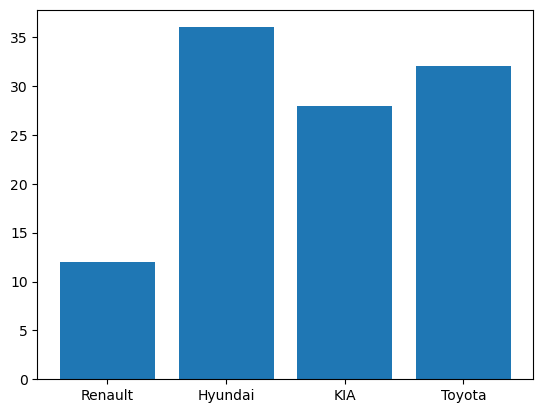

In [20]:
# выведем данные с помощью столбчатой диаграммы
# обратите внимание, что служебную информацию о графике можно убрать с помощью plt.show(),
# и с помощью точки с запятой ";"
plt.bar(cars.model, cars.stock);

#### Порядковые данные

In [24]:
# соберем данные об уровне удовлетворенности десяти человек
satisfaction = pd.DataFrame(
    {
        "sat_level": [
            "Good",
            "Medium",
            "Good",
            "Medium",
            "Bad",
            "Medium",
            "Good",
            "Medium",
            "Medium",
            "Bad",
        ]
    }
)

satisfaction

,sat_level
0,Good
1,Medium
2,Good
3,Medium
4,Bad
5,Medium
6,Good
7,Medium
8,Medium
9,Bad


In [25]:
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sat_level  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes


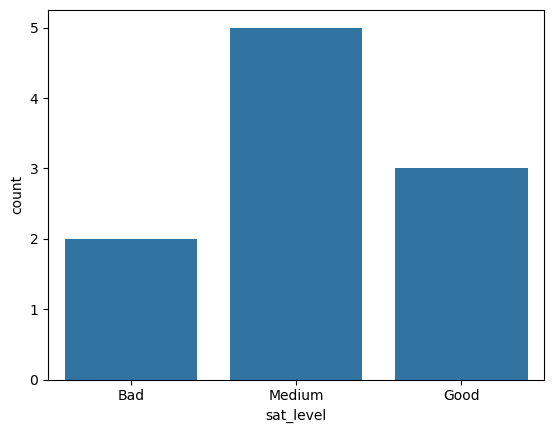

In [26]:
# переведем данные в тип categorical
satisfaction.sat_level = pd.Categorical(
    satisfaction.sat_level, categories=["Bad", "Medium", "Good"], ordered=True
)

# построим столбчатую диаграмму типа countplot
# с количеством оценок в каждой из категорий
sns.countplot(x="sat_level", data=satisfaction);

In [27]:
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sat_level  10 non-null     category
dtypes: category(1)
memory usage: 274.0 bytes


### Количественные данные

#### Дискретные данные

Распределение Пуассона

In [28]:
# смоделируем количество поступающих в колл-центр звонков,
# передав матожидание (lam) и желаемое количество экспериментов (size)
res = np.random.poisson(lam=3, size=1000)

# посмотрим на первые 10 значений
res[:10]

array([6, 5, 6, 4, 3, 5, 1, 2, 2, 3])

In [34]:
# получим количество звонков в минуту (unique) и соответствующую им частоту (counts)
unique, counts = np.unique(res, return_counts=True)
unique, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 50, 140, 228, 230, 153, 112,  50,  20,  11,   3,   2,   1],
       dtype=int64))

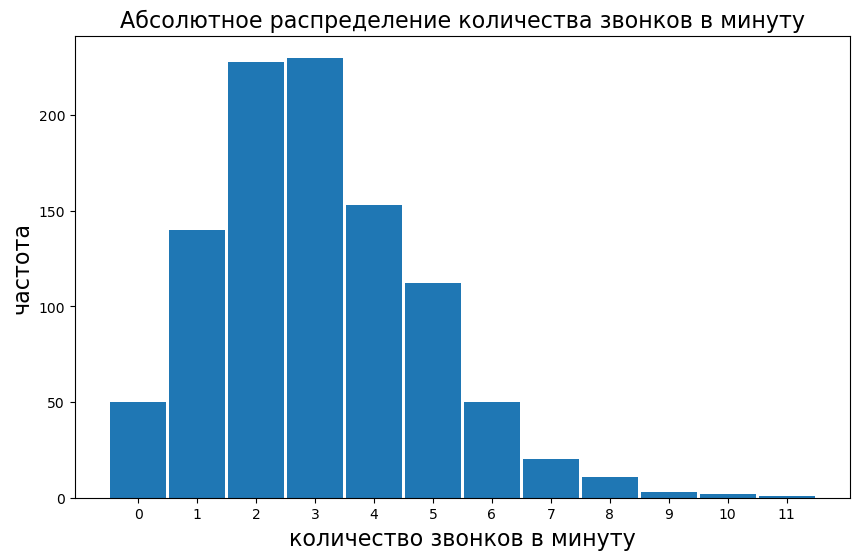

In [35]:
# выведем абсолютные значения распределения количества звонков в минуту
plt.figure(figsize=(10, 6))
plt.bar([str(x) for x in unique], counts, width=0.95)
plt.title("Абсолютное распределение количества звонков в минуту", fontsize=16)
plt.xlabel("количество звонков в минуту", fontsize=16)
plt.ylabel("частота", fontsize=16);

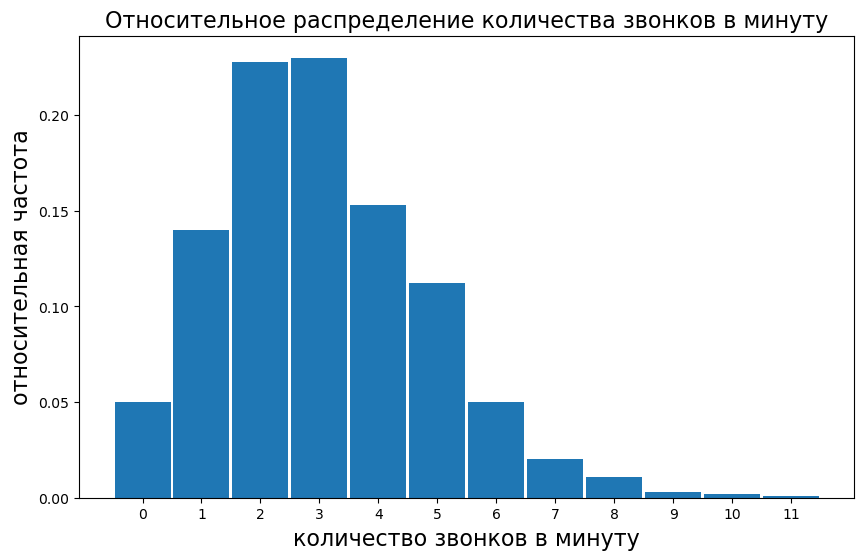

In [36]:
plt.figure(figsize=(10, 6))
# теперь посмотрим на относительное распределение количества звонков в минуту
# для этого просто разделим количество звонков в каждом из столбцов на общее число звонков
plt.bar([str(x) for x in unique], counts / len(res), width=0.95)
plt.title("Относительное распределение количества звонков в минуту", fontsize=16)
plt.xlabel("количество звонков в минуту", fontsize=16)
plt.ylabel("относительная частота", fontsize=16);

In [37]:
# рассчитаем вероятность получить более шести звонков в минуту
np.round(len(res[res > 6]) / len(res), 3)

0.037

In [38]:
# рассчитаем вероятность получить от двух до шести звонков в минуту включительно
np.round(len(res[res <= 6]) / len(res) - len(res[res < 2]) / len(res), 3)

0.773

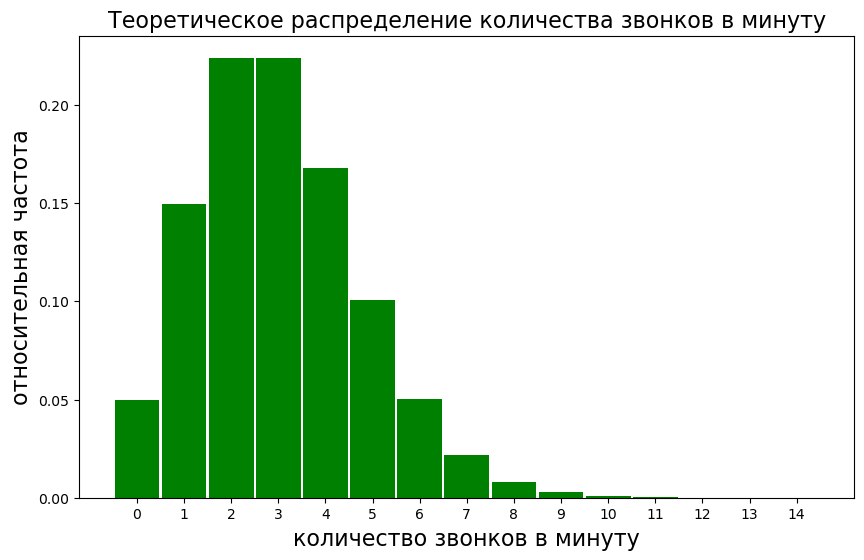

In [53]:
# создадим последовательность целых чисел от 0 до 14
xx = np.arange(15)
# передадим их в функцию poisson.pmf()
# mu в данном случае это матожидание (lambda из формулы)
ff = poisson.pmf(xx, mu=3)

# построим график теоретического распределения, изменив для наглядности его цвет
plt.figure(figsize=(10, 6))
plt.bar([str(x) for x in xx], ff, width=0.95, color="green")
plt.title("Теоретическое распределение количества звонков в минуту", fontsize=16)
plt.xlabel("количество звонков в минуту", fontsize=16)
plt.ylabel("относительная частота", fontsize=16);

In [47]:
# рассчитаем вероятность получения нуля звонков или одного звонка в час
poisson.cdf(1, 3).round(3)

0.199

In [54]:
# найдем площадь столбцов до шести звонков в минуту включительно
# и вычтем результат из единицы
np.round(1 - poisson.cdf(6, 3), 3)

0.034

In [55]:
# для выполнения второго задания вычтем площадь столбцов ноль и один
# из площади столбцов до шестого вaключительно
np.round(poisson.cdf(6, 3) - poisson.cdf(1, 3), 3)

0.767

#### Непрерывные данные

См. пример [нормального распределения](https://www.dmitrymakarov.ru/python/random-11-03/#6-normalnoe-raspredelenie) непрерывных данных в занятии по модулю random.

## Перекрестные данные, временные ряды и панельные данные

### Перекрестные данные

In [56]:
# создадим датафрейм с данными по Франции, Бельгии и Испании
csect = pd.DataFrame(
    {
        "countries": ["France", "Belgium", "Spain"],
        "healthcare": [4492, 5428, 3616],
        "education": [9210, 10869, 6498],
    }
)

# посмотрим на результат
csect

,countries,healthcare,education
0,France,4492,9210
1,Belgium,5428,10869
2,Spain,3616,6498


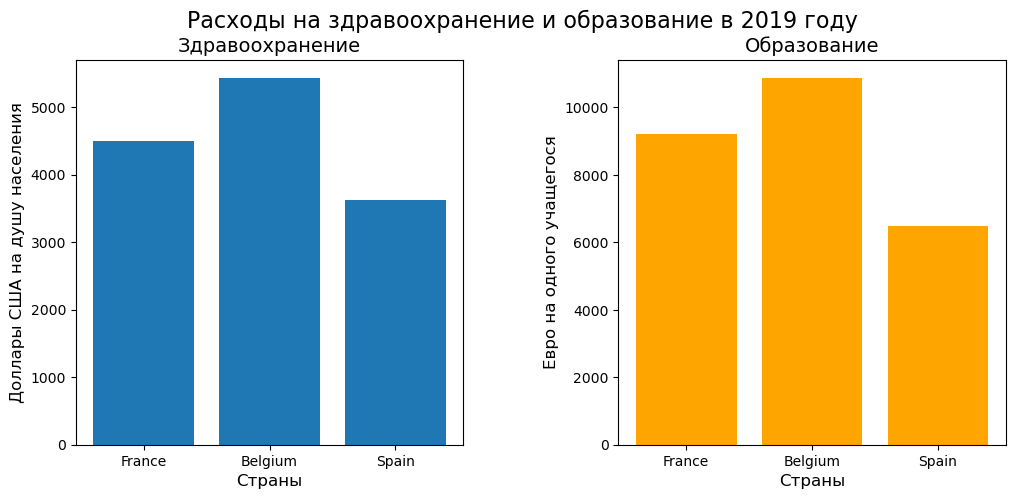

In [68]:
# зададим размер фигуры для обоих графиков
plt.figure(figsize=(12, 5))

# используем функцию plt.subplot() для создания первого графика (index = 1)
# передаваемые параметры: nrows, ncols, index
plt.subplot(121)
# построим столбчатую диаграмму для здравоохранения
plt.bar(csect.countries, csect.healthcare)
plt.title("Здравоохранение", fontsize=14)
plt.xlabel("Страны", fontsize=12)
plt.ylabel("Доллары США на душу населения", fontsize=12)

# создадим второй график (index = 2)
# параметры можно передать одним числом
plt.subplot(122)
# построим столбчатую диаграмму для образования
plt.bar(csect.countries, csect.education, color="orange")
plt.title("Образование", fontsize=14)
plt.xlabel("Страны", fontsize=12)
plt.ylabel("Евро на одного учащегося", fontsize=12)

# отрегулируем пространство между графиками
plt.subplots_adjust(wspace=0.4)

# зададим общий график
plt.suptitle("Расходы на здравоохранение и образование в 2019 году ", fontsize=16)

# выведем результат
plt.show()

### Временные ряды

In [69]:
# создадим временной ряд расходов на здравоохранение во Франции с 2010 по 2019 годы
tseries = pd.DataFrame(
    {
        "year": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        "healthcare": [4598, 4939, 4651, 4902, 4999, 4208, 4268, 4425, 4690, 4492],
    }
)

# превратим год в объект datetime
tseries.year = pd.to_datetime(tseries.year, format="%Y")
# и сделаем этот столбец индексом
tseries.set_index("year", drop=True, inplace=True)

# посмотрим на результат
tseries

,healthcare
year,
2010-01-01,4598
2011-01-01,4939
2012-01-01,4651
2013-01-01,4902
2014-01-01,4999
2015-01-01,4208
2016-01-01,4268
2017-01-01,4425
2018-01-01,4690


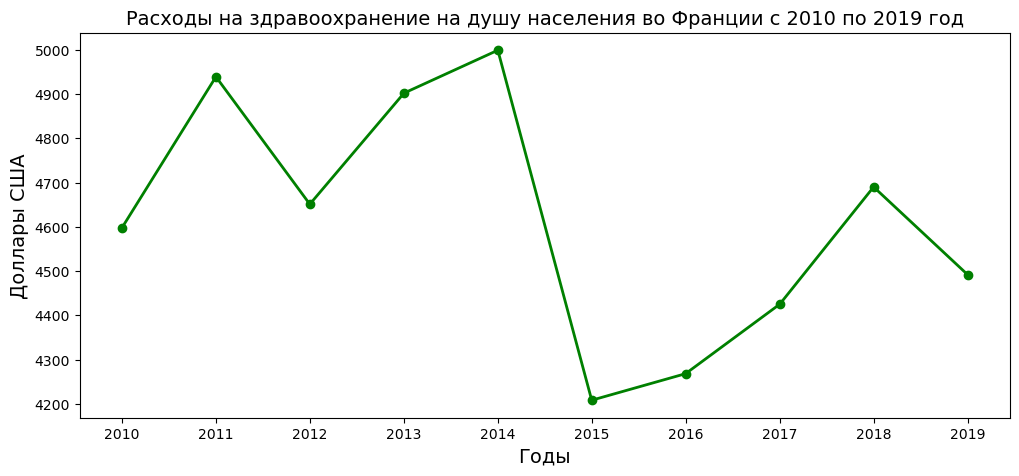

In [70]:
# выведем эти данные с помощью линейного графика
plt.figure(figsize=(12, 5))
# дополнительно укажем цвет, толщину линии и вид маркера
plt.plot(tseries, color="green", linewidth=2, marker="o")

# добавим подписи к осям и заголовок
plt.xlabel("Годы", fontsize=14)
plt.ylabel("Доллары США", fontsize=14)
plt.title(
    "Расходы на здравоохранение на душу населения во Франции с 2010 по 2019 год",
    fontsize=14,
)

# выведем результат
plt.show()

### Панельные данные

Создание датафрейма с панельными данными с помощью иерархического индекса

In [71]:
# вначале создадим датафрейм с данными расходов на душу населения
# на здравоохранение трех стран с 2015 по 2019 годы
# первые пять цифр относятся к Франции, вторые пять - к Бельгии, третьи пять - к Испании
pdata = pd.DataFrame(
    {
        "healthcare": [
            4208,
            4268,
            4425,
            4690,
            4492,
            4290,
            4323,
            4618,
            4913,
            4960,
            2349,
            2377,
            2523,
            2736,
            2542,
        ]
    }
)

In [72]:
# создадим кортежи для иерархического индекса
rows = [
    ("France", "2015"),
    ("France", "2016"),
    ("France", "2017"),
    ("France", "2018"),
    ("France", "2019"),
    ("Belgium", "2015"),
    ("Belgium", "2016"),
    ("Belgium", "2017"),
    ("Belgium", "2018"),
    ("Belgium", "2019"),
    ("Spain", "2015"),
    ("Spain", "2016"),
    ("Spain", "2017"),
    ("Spain", "2018"),
    ("Spain", "2019"),
]

# передадим кортежи в функцию pd.MultiIndex.from_tuples(),
# указав названия уровней индекса
custom_multindex = pd.MultiIndex.from_tuples(rows, names=["country", "year"])

# сделаем custom_multindex индексом датафрейма с панельными данными
pdata.index = custom_multindex

# посмотрим на результат
pdata

healthcare
country year            
France  2015        4208
        2016        4268
        2017        4425
        2018        4690
        2019        4492
Belgium 2015        4290
        2016        4323
        2017        4618
        2018        4913
        2019        4960
Spain   2015        2349
        2016        2377
        2017        2523
        2018        2736
        2019        2542

Визуализация панельных данных

In [75]:
# сделаем данные по странам (index level = 0) отдельными столбцами
pdata_unstacked = pdata.healthcare.unstack(level=0)

# метод .unstack() выстроит столбцы в алфавитном порядке
pdata_unstacked

country,Belgium,France,Spain
year,,,
2015,4290,4208,2349
2016,4323,4268,2377
2017,4618,4425,2523
2018,4913,4690,2736
2019,4960,4492,2542


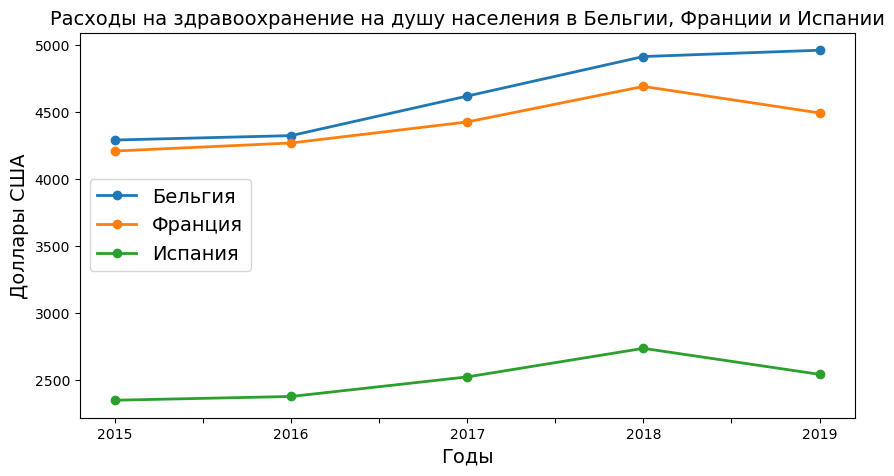

In [76]:
# зададим размер графика
plt.figure(figsize=(10, 5))

# построим три кривые
pdata_unstacked.Belgium.plot(linewidth=2, marker="o", label="Бельгия")
pdata_unstacked.France.plot(linewidth=2, marker="o", label="Франция")
pdata_unstacked.Spain.plot(linewidth=2, marker="o", label="Испания")

# дополним подписями к осям, заголовком и легендой
plt.xlabel("Годы", fontsize=14)
plt.ylabel("Доллары США", fontsize=14)
plt.title(
    "Расходы на здравоохранение на душу населения в Бельгии, Франции и Испании",
    fontsize=14,
)
plt.legend(loc="center left", prop={"size": 14})

plt.show()

array([[<Axes: title={'center': 'Бельгия'}, ylabel='доллары США'>,
        <Axes: title={'center': 'Франция'}, ylabel='доллары США'>,
        <Axes: title={'center': 'Испания'}, ylabel='доллары США'>]],
      dtype=object)

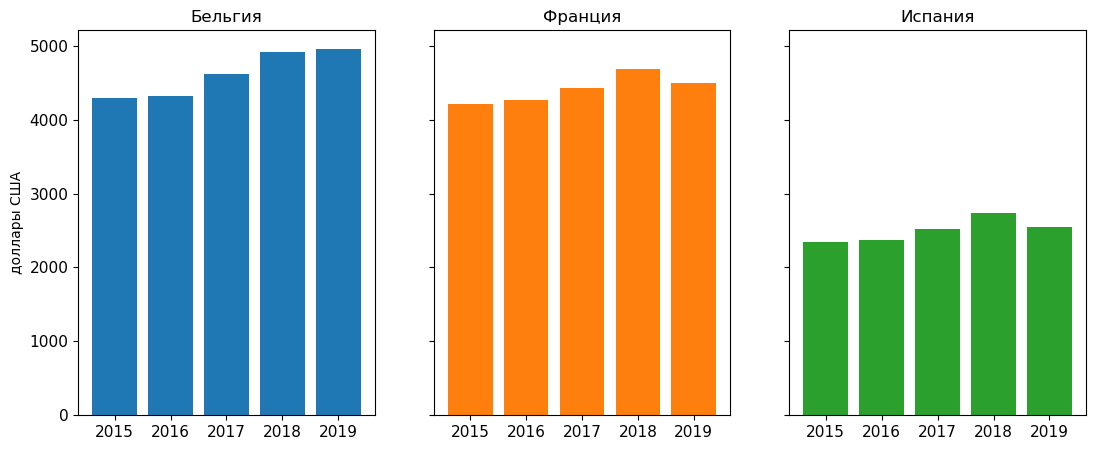

In [109]:
pdata_unstacked.plot(
    kind="bar",
    subplots=True,
    layout=(1, 3),
    rot=0,
    figsize=(13, 5),
    sharey=True,
    fontsize=11,
    width=0.8,
    xlabel="",
    ylabel="доллары США",
    legend=False,  # Изменено с None на False
    title=["Бельгия", "Франция", "Испания"],
)

## Одномерный и многомерный анализ

#### Многомерный временной ряд

In [110]:
# создадим временной ряд расходов на здравоохранение во Франции на душу населения
# и приведем процент ВВП, потраченный на образование, за аналогичный период
tseries_mult = pd.DataFrame(
    {
        "year": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        "healthcare": [4598, 4939, 4651, 4902, 4999, 4208, 4268, 4425, 4690, 4492],
        "education": [5.69, 5.52, 5.46, 5.50, 5.51, 5.46, 5.48, 5.45, 5.41, 6.62],
    }
)

# превратим год в объект datetime
tseries_mult.year = pd.to_datetime(tseries_mult.year, format="%Y")
# и сделаем этот столбец индексом
tseries_mult.set_index("year", drop=True, inplace=True)

# посмотрим на результат
tseries_mult

,healthcare,education
year,,
2010-01-01,4598,5.69
2011-01-01,4939,5.52
2012-01-01,4651,5.46
2013-01-01,4902,5.50
2014-01-01,4999,5.51
2015-01-01,4208,5.46
2016-01-01,4268,5.48
2017-01-01,4425,5.45
2018-01-01,4690,5.41


#### Многомерные панельные данные

In [111]:
# вначале создадим датафрейм с данными расходов на здравоохранение и образование
pdata_mult = pd.DataFrame(
    {
        "healthcare, per capita": [
            4208,
            4268,
            4425,
            4690,
            4492,
            4290,
            4323,
            4618,
            4913,
            4960,
            2349,
            2377,
            2523,
            2736,
            2542,
        ],
        "education, % of GDP": [
            5.46,
            5.48,
            5.45,
            5.41,
            6.62,
            6.45,
            6.46,
            6.43,
            6.38,
            6.40,
            4.29,
            4.23,
            4.21,
            4.18,
            4.26,
        ],
    }
)

# создадим кортежи для иерархического индекса
rows = [
    ("France", "2015"),
    ("France", "2016"),
    ("France", "2017"),
    ("France", "2018"),
    ("France", "2019"),
    ("Belgium", "2015"),
    ("Belgium", "2016"),
    ("Belgium", "2017"),
    ("Belgium", "2018"),
    ("Belgium", "2019"),
    ("Spain", "2015"),
    ("Spain", "2016"),
    ("Spain", "2017"),
    ("Spain", "2018"),
    ("Spain", "2019"),
]

# передадим кортежи в функцию pd.MultiIndex.from_tuples(),
# указав названия уровней индекса
custom_multindex = pd.MultiIndex.from_tuples(rows, names=["country", "year"])

# сделаем custom_multindex индексом датафрейма с панельными данными
pdata_mult.index = custom_multindex

# посмотрим на результат
pdata_mult

healthcare, per capita  education, % of GDP
country year                                             
France  2015                    4208                 5.46
        2016                    4268                 5.48
        2017                    4425                 5.45
        2018                    4690                 5.41
        2019                    4492                 6.62
Belgium 2015                    4290                 6.45
        2016                    4323                 6.46
        2017                    4618                 6.43
        2018                    4913                 6.38
        2019                    4960                 6.40
Spain   2015                    2349                 4.29
        2016                    2377                 4.23
        2017                    2523                 4.21
        2018                    2736                 4.18
        2019                    2542                 4.26

## Библиотеки

### Matplotlib

#### Стиль MATLAB

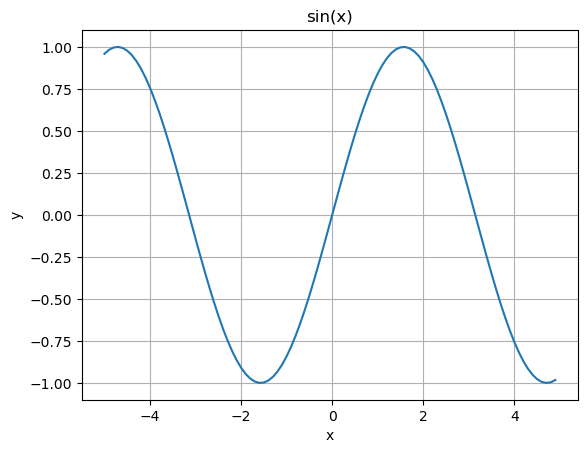

In [112]:
# зададим последовательность от -5 до 5 с шагом 0,1
xxx = np.arange(-5, 5, 0.1)

# построим график синусоиды
plt.plot(xxx, np.sin(xxx))

# зададим заголовок, подписи к осям и сетку
plt.title("sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid();

#### Подход ООП

In [113]:
# создадим объект класса figure
fig = plt.figure()

# и посмотрим на его тип
print(type(fig))

<class 'matplotlib.figure.Figure'>


<Figure size 640x480 with 0 Axes>

In [114]:
# применим метод .add_subplot() для создания подграфика (объекта ax)
# напомню, что первые два параметра задают количество строк и столбцов,
# третий параметр - это индекс (порядковый номер подграфика)
ax = fig.add_subplot(2, 1, 1)

# посмотрим на тип этого объекта
print(type(ax))

<class 'matplotlib.axes._axes.Axes'>


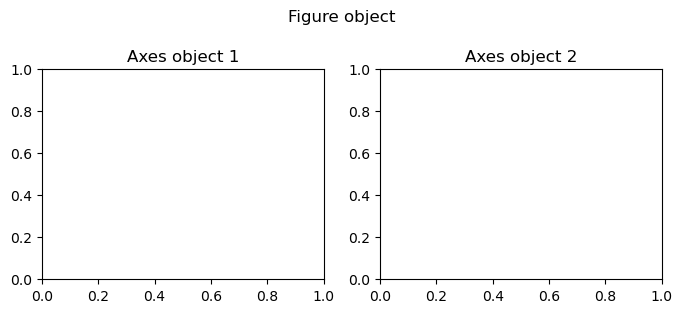

In [115]:
# вначале создаем объект figure, указываем размер объекта
fig = plt.figure(figsize=(8, 6))
# и его заголовок с помощью метода .suptitle()
fig.suptitle("Figure object")
# можно и plt.suptitle('Figure object')

# внутри него создаем первый объекта класса axes
ax1 = fig.add_subplot(2, 2, 1)
# к этому объекту можно применять различные методы
ax1.set_title("Axes object 1")

# и второй (напомню, параметры можно передать без запятых)
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Axes object 2")

# выведем результат
plt.show()

# Pandas

matplotlib.axes._axes.Axes

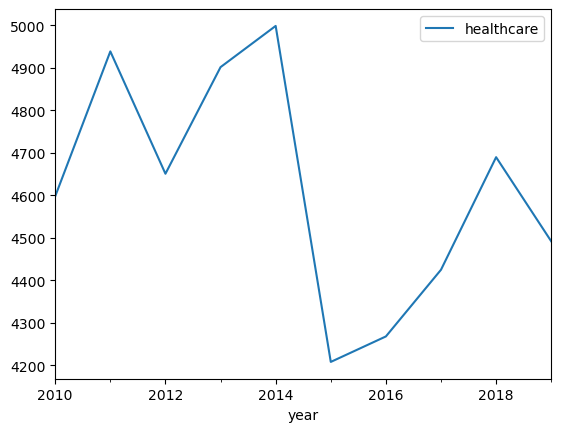

In [116]:
# "под капотом" для построения графиков
# библиотека Pandas использует объекты библиотеки matplotilb
# в этом несложно убедиться с помощью функции type()
type(tseries.plot())

### Seaborn

In [117]:
# см. примеры выше

### Plotly Express

In [119]:
csect

,countries,healthcare,education
0,France,4492,9210
1,Belgium,5428,10869
2,Spain,3616,6498


In [ ]:
# по оси x разместим страны, по оси y - признаки
# параметр barmode = 'group' указывает,
# что столбцы образования и здравоохранения нужно разместить рядом,
# а не внутри одного столбца (stacked)
px.bar(csect, x="countries", y=["healthcare", "education"], barmode="group")